In [1]:
import pandas as pd
from pprint import pprint
import numpy as np
import ollama
import matplotlib.pyplot as plt
from rouge_score import rouge_scorer
import math


In [2]:
LLM = "gemma2"

PATH_TO_RESULTS = f"results/results_{LLM}.csv" 
PATH_TO_PLOTS = f"results/{LLM}/"

In [3]:
results = pd.read_csv(PATH_TO_RESULTS, sep=';')
print(results.head())

# count nan in columns
print("llm0: ", results['llm0'].isna().sum())
print("llm1: ", results['llm1'].isna().sum())
print("llm2: ", results['llm2'].isna().sum())
print("llm3: ", results['llm3'].isna().sum())
print("expert_answer: ", results['expert_answer'].isna().sum())

# replace nan with empty string
results= results.fillna('')

   Unnamed: 0  conversation_id  \
0           0         15137761   
1           1         15104383   
2           2         15059877   
3           3         15140315   
4           4         15146691   

                                       user_question  \
0  Seit 3 Tagen Behandlung eines Ekzem am Hals mi...   
1  Chronische Nierenschwäche (zu viel Eiweiß und ...   
2  Sehr geehrter Dr. Stehn, ich habe seid 7 Woche...   
3  Hallo Zusammen, Vor 3 Jahren OV mit einer Frau...   
4  Guten Tag, Ich hatte vor ca. 1 1/2 Monaten Cor...   

                                       expert_answer  \
0  Hallo,\nsollte eine Therapie nicht anschlagen,...   
1  Hallo\n,\nLeider dürfen wir ohne\nUntersuchung...   
2  Sehr geehrte Ringelblume,\ngrundsätzlich gilt ...   
3  Hallo,\nin der Tat sind\nChlamydien\nund\nMyko...   
4  Hallo,\nin der Regel heilt das Trommelfell wie...   

                                        user_context  \
0  Seit 3 Tagen Behandlung eines Ekzem am Hals mi...   
1  Chroni

In [4]:
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
scores = results.apply(lambda x: scorer.score(x['expert_answer'], x['llm0']), axis=1)

# extract numpy arrays for each score
# (precision, recall, f1)
rouge1 = np.array([score['rouge1'] for score in scores])
rouge2 = np.array([score['rouge2'] for score in scores])
rougeL = np.array([score['rougeL'] for score in scores])

In [5]:
def get_rouge_scores(column_name, ngrams=[1, 2], use_stemmer=True):
    rouge_types = ['rouge' + str(i) for i in ngrams] + ['rougeL']
    scorer2 = rouge_scorer.RougeScorer(rouge_types, use_stemmer=use_stemmer)
    scores2 = results.apply(lambda x: scorer2.score(x['expert_answer'], x[column_name]), axis=1)
    return scores2

In [6]:
rouge_scores_llm0 = get_rouge_scores('llm0')
rouge_scores_llm1 = get_rouge_scores('llm1')
rouge_scores_llm2 = get_rouge_scores('llm2')
rouge_scores_llm3 = get_rouge_scores('llm3')

In [7]:
rouge1_llm0 = np.array([score['rouge1'] for score in rouge_scores_llm0])
rouge2_llm0 = np.array([score['rouge2'] for score in rouge_scores_llm0])
rougel_llm0 = np.array([score['rougeL'] for score in rouge_scores_llm0])
rouge1_llm1 = np.array([score['rouge1'] for score in rouge_scores_llm1])
rouge2_llm1 = np.array([score['rouge2'] for score in rouge_scores_llm1])
rougel_llm1 = np.array([score['rougeL'] for score in rouge_scores_llm1])
rouge1_llm2 = np.array([score['rouge1'] for score in rouge_scores_llm2])
rouge2_llm2 = np.array([score['rouge2'] for score in rouge_scores_llm2])
rougel_llm2 = np.array([score['rougeL'] for score in rouge_scores_llm2])
rouge1_llm3 = np.array([score['rouge1'] for score in rouge_scores_llm3])
rouge2_llm3 = np.array([score['rouge2'] for score in rouge_scores_llm3])
rougel_llm3 = np.array([score['rougeL'] for score in rouge_scores_llm3])


In [9]:
def boxplot_rouge_scores(measures, labels, xlabel="", ylabel="", title="", filename=None):
    # boxplot rouge 1 scores
    plt.boxplot(measures)
    plt.xticks(np.arange(1, len(measures)+1), labels, rotation=45)
    # label mean values
    for i, measure in enumerate(measures):
        plt.text(i+1, np.mean(measure), str(round(np.mean(measure), 3)), color='blue')
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    if filename:
        plt.savefig(filename, bbox_inches='tight')
    plt.show()

def lineplots_rouge_scores(measures, labels, xlabel="", ylabel="", title="", filename=None):
    fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(16, 16))
    
    for i, measure in enumerate(measures):
        if i == 0:
            ax[math.floor(i/2), i%2].plot(np.arange(len(measure)), measures[0], label=labels[0])
            continue
        ax[math.floor(i/2), i%2].plot(np.arange(len(measure)), measures[0], label=labels[0])
        ax[math.floor(i/2), i%2].plot(np.arange(len(measure)), measure, label=labels[i])
        ax[math.floor(i/2), i%2].legend()
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    if filename:
        plt.savefig(filename, bbox_inches='tight')
    plt.show()

## Plot F1 Scores for different experimental setups
### Rouge -1 

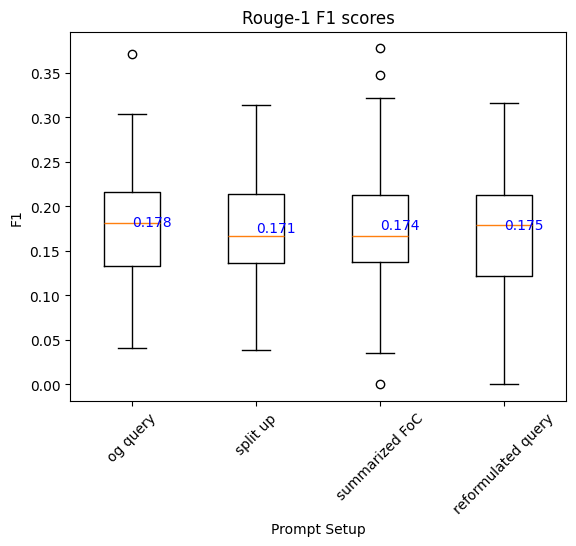

In [10]:
# boxplot rouge 1 scores
rouge_1_f1 = [rouge1_llm0.T[2], rouge1_llm1.T[2], rouge1_llm2.T[2], rouge1_llm3.T[2]]
labels = ['og query', 'split up', 'summarized FoC', 'reformulated query']

boxplot_rouge_scores(rouge_1_f1, labels, 'Prompt Setup', 'F1', 'Rouge-1 F1 scores', f'{PATH_TO_PLOTS}rouge1_f1.png')

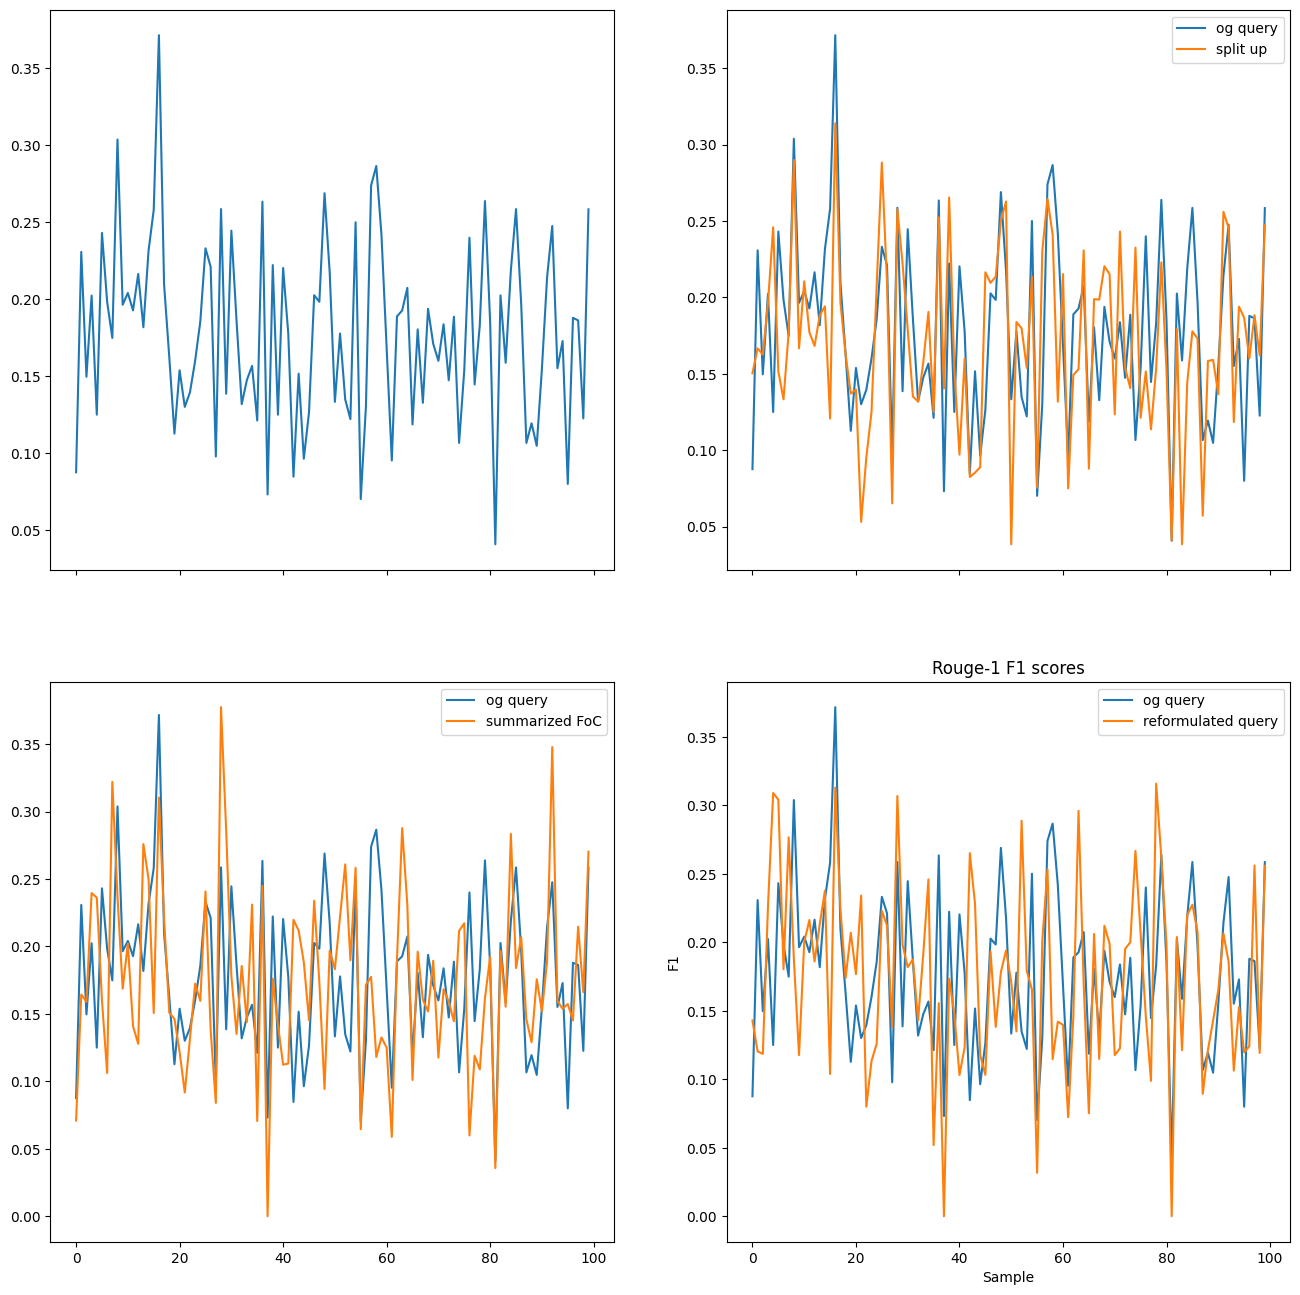

In [11]:
lineplots_rouge_scores(rouge_1_f1, labels, 'Sample','F1', 'Rouge-1 F1 scores', f'{PATH_TO_PLOTS}rouge1_f1_scatter.png')

### Rouge-2

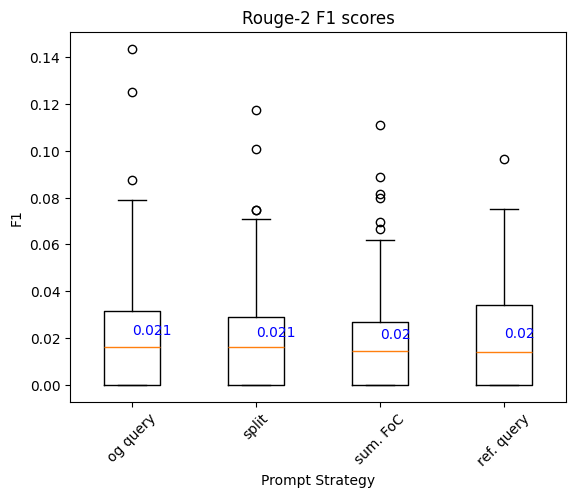

In [12]:
# boxplot rouge 1 scores
rouge_2_f1 = [rouge2_llm0.T[2], rouge2_llm1.T[2], rouge2_llm2.T[2], rouge2_llm3.T[2]]
labels = ['og query', 'split', 'sum. FoC', 'ref. query']

boxplot_rouge_scores(rouge_2_f1, labels, 'Prompt Strategy', 'F1', 'Rouge-2 F1 scores', f'{PATH_TO_PLOTS}rouge2_f1.png')

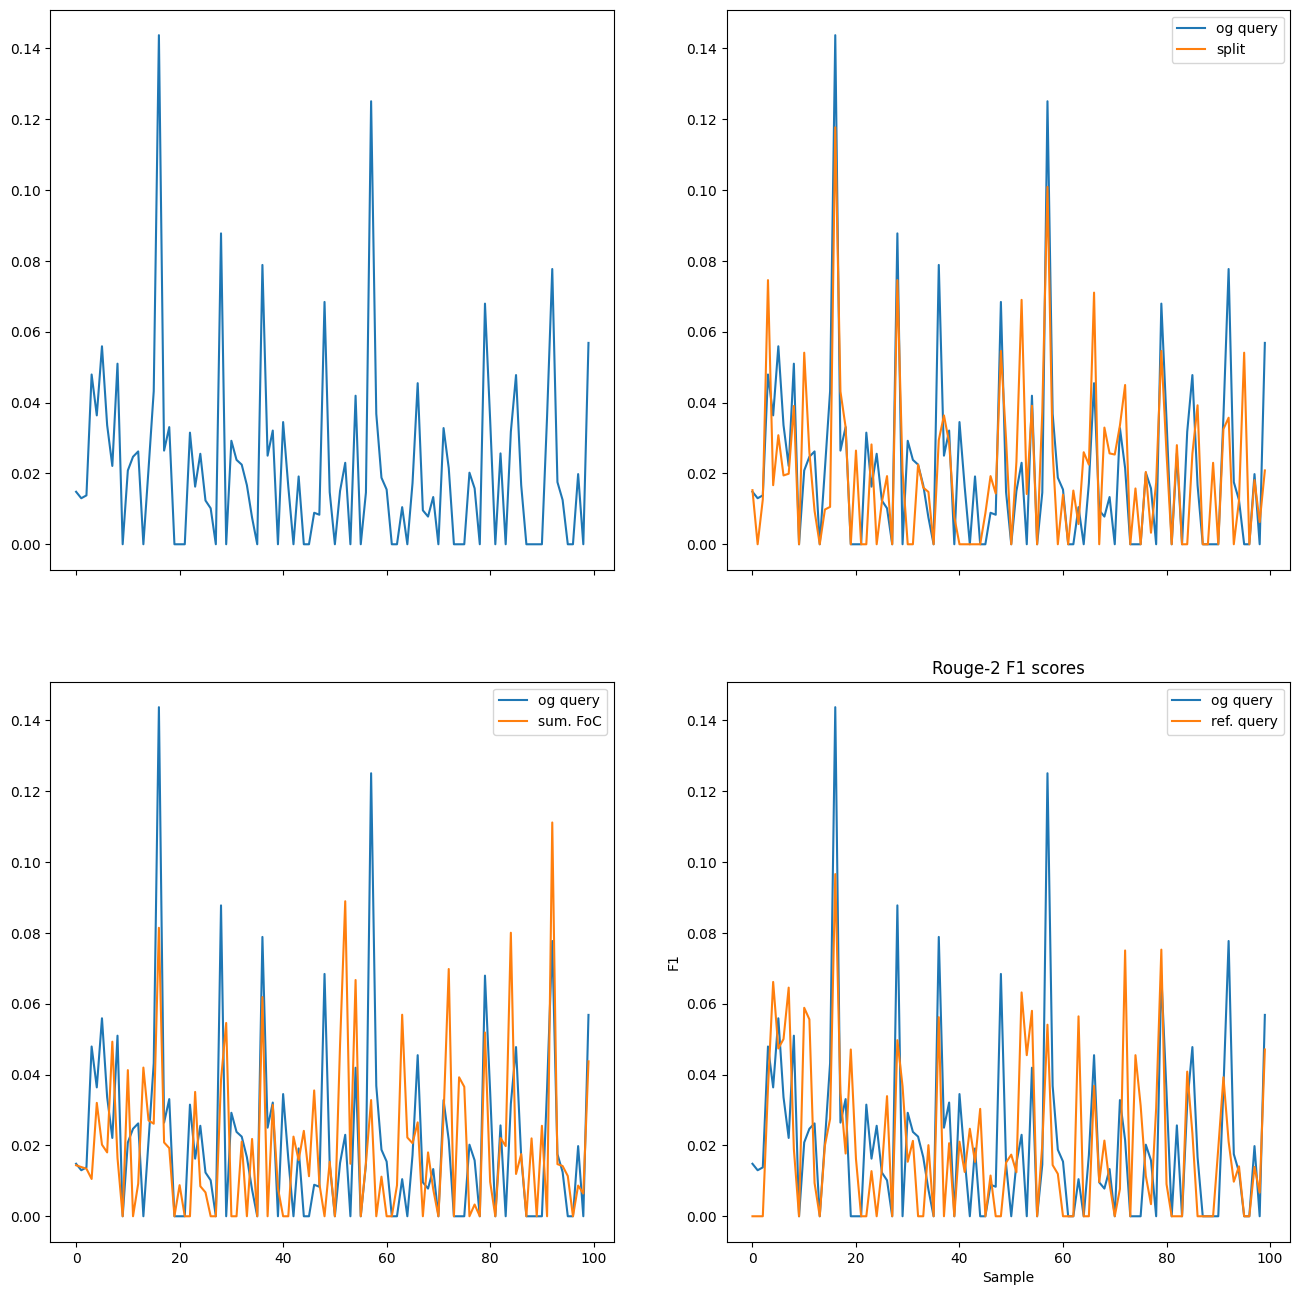

In [13]:
lineplots_rouge_scores(rouge_2_f1, labels, 'Sample', 'F1', 'Rouge-2 F1 scores', f'{PATH_TO_PLOTS}rouge2_f1_scatter.png')

### Rouge-L

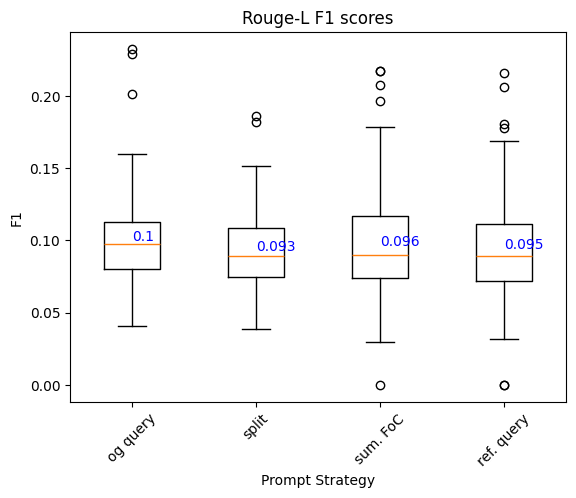

In [14]:
# boxplot Rouge L scores
rouge_L_f1 = [rougel_llm0.T[2], rougel_llm1.T[2], rougel_llm2.T[2], rougel_llm3.T[2]]
labels = ['og query', 'split', 'sum. FoC', 'ref. query']

boxplot_rouge_scores(rouge_L_f1, labels, 'Prompt Strategy', 'F1', 'Rouge-L F1 scores', f'{PATH_TO_PLOTS}rougel_f1.png')

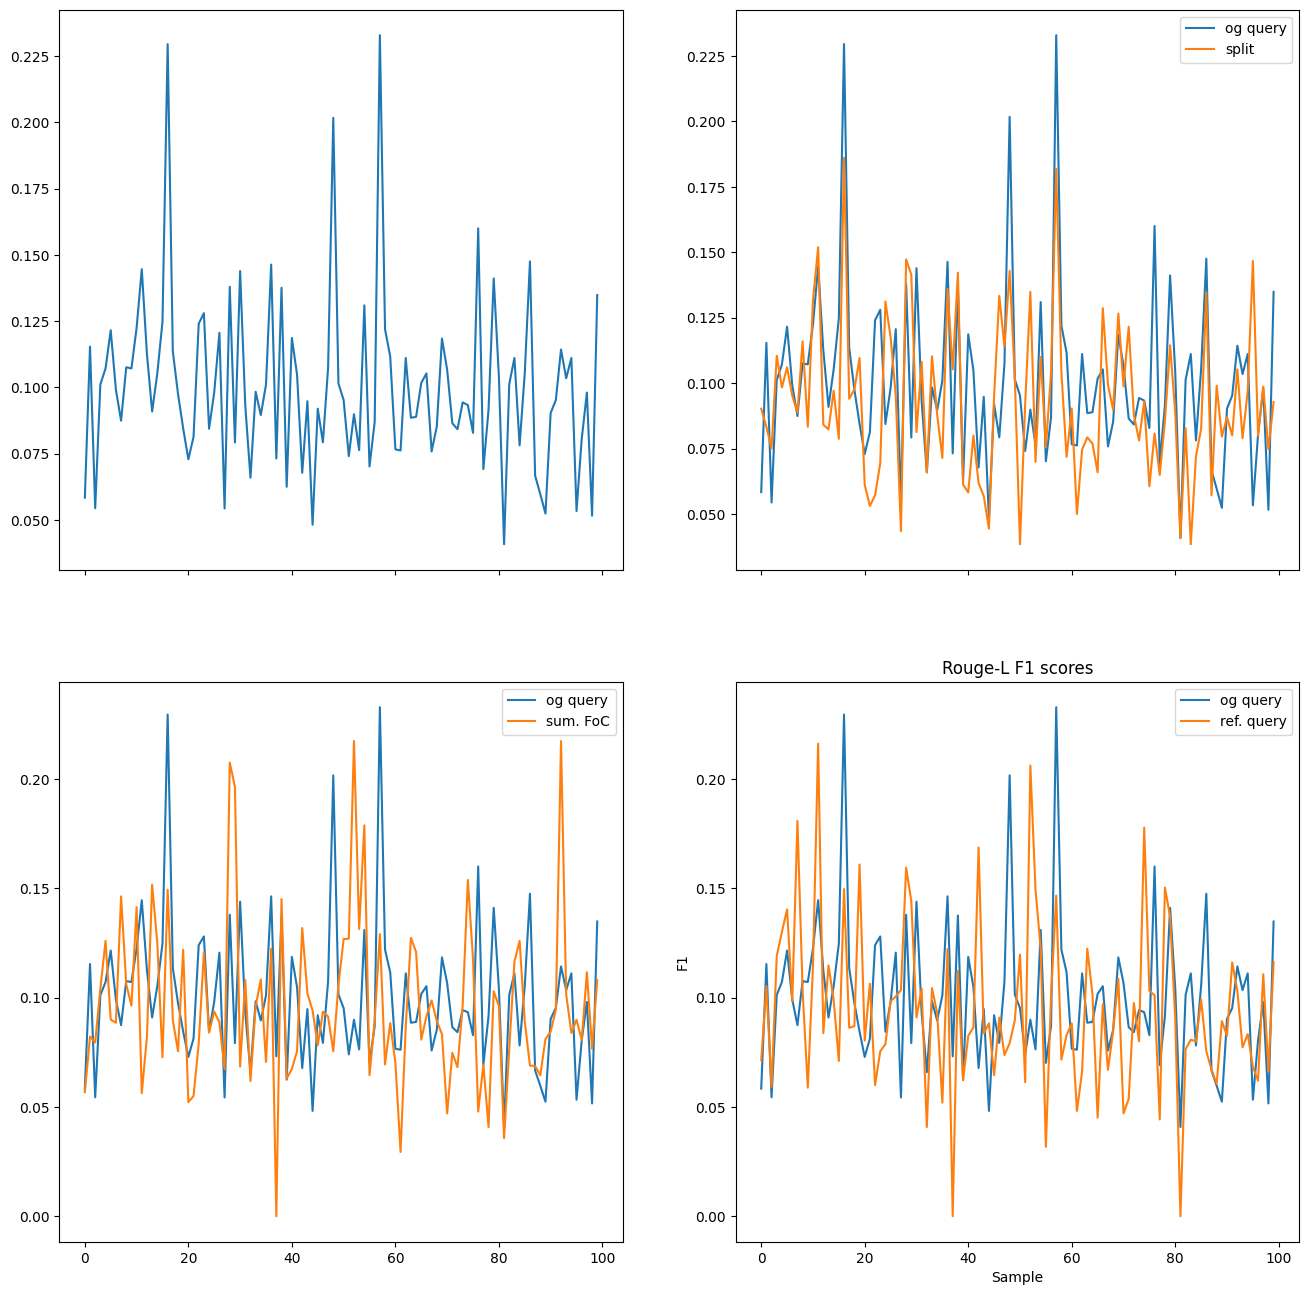

In [15]:
lineplots_rouge_scores(rouge_L_f1, labels, 'Sample', 'F1', 'Rouge-L F1 scores', f'{PATH_TO_PLOTS}rougel_f1_scatter.png')